# Presentation

In this notebook we explore 1D optimal transport by computing the barycenter between spectra. 

We'll first explore 1D OT on gaussians followed by 1D OT on pure sine waves. In the end we explore this method on real signals.

We'll compute barycenters using 3 functions:

* Quantile method   
* Entropic barycenter 
* Regularized sinkhorn

In [1]:
import librosa
import IPython
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
import ot

## OT between gaussians

In this part we compute 1D Optimal transport between two gaussian distributions.


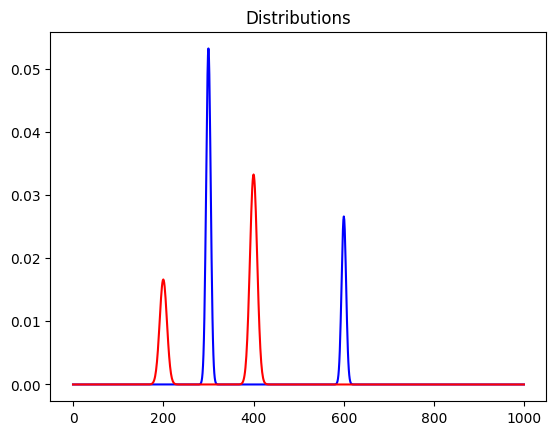

In [6]:
# We compute two 1000-bins gaussian distributions with different mean and std

n = 1000
x = np.arange(n, dtype=np.float64)

f1 = n * 0.3
f2 = n * 0.2
s1 = n * 0.005
s2 = n * 0.008

# Gaussian distributions
a1 = 1.0 * ot.datasets.make_1D_gauss(n, m=f1, s=s1) + 0.5 * ot.datasets.make_1D_gauss(n, m=f1*2, s=s1)
a1 = a1 / np.sum(a1)
a2 = 0.5 * ot.datasets.make_1D_gauss(n, m=f2, s=s2) + 1.0 * ot.datasets.make_1D_gauss(n, m=f2*2, s=s2)
a2 = a2 / np.sum(a2)

fig, ax = plt.subplots()
ax.plot(x, a1, color="blue")
ax.plot(x, a2, color="red")
ax.set_title('Distributions')

plt.show()


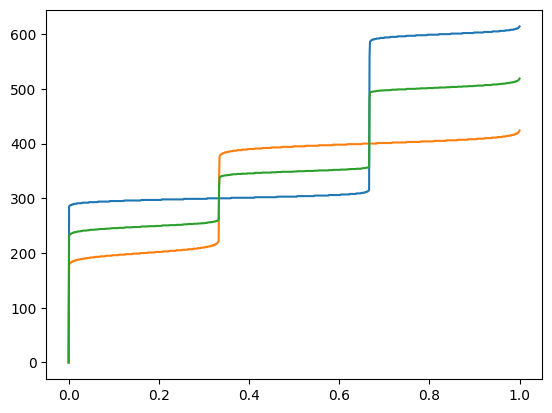

In [35]:
def quantile(a):
    n = len(a)
    X = np.cumsum(a)
    U = np.linspace(0, 1, n)

    Fm = []
    for u in U:
        for f in range(1000):
            if X[f] >= u:
                Fm.append(f)
                break

    return np.array(Fm)

def quantile_bary(a1, a2, alpha=0.5):
    q1 = quantile(a1)
    q2 = quantile(a2)
    
    return (1 - alpha) * q1 + alpha * q2

U = np.linspace(0, 1, n -1)

plt.plot(U,quantile(a1))
plt.plot(U,quantile(a2))
plt.plot(U,quantile_bary(a1, a2))


0.001002004008016032
0.001002004008016032
0.0010020040080160318
0.0010020040080160322
0.0010020040080160322
0.0010020040080160313
0.0010020040080160322
0.0010020040080160322
0.0010020040080160313
0.001002004008016033
0.0010020040080160313
0.0010020040080160313
0.001002004008016033
0.0010020040080160313
0.001002004008016033
0.0010020040080160313
0.001002004008016033
0.0010020040080160296
0.001002004008016033
0.001002004008016033
0.0010020040080160296
0.001002004008016033
0.001002004008016033
0.0010020040080160296
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.0010020040080160296
0.001002004008016033
0.001002004008016033
0.0010020040080160296
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.0010020040080160261
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.0010020040080160261
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.001002004008016033
0.00100200400801

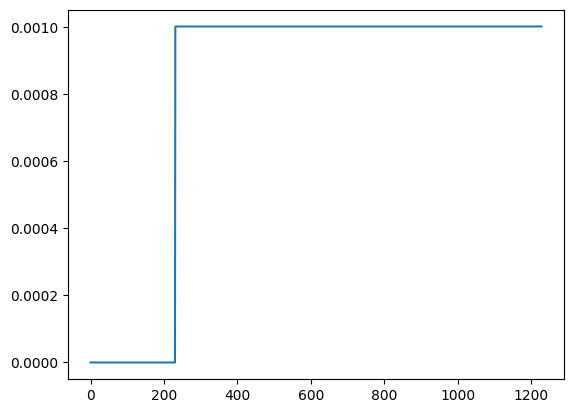

In [56]:
z = quantile_bary(a1, a2)

def reverse(quantile_bary):
    n = len(quantile_bary)
    U = np.linspace(0, 1, n)
    gaussian = []
    for _ in range(int(np.floor(quantile_bary[1]))):
        gaussian.append(0)
    for i in range(1, len(U)):
        print(U[i] - U[i-1])
        gaussian.append(U[i] - U[i-1])

    return np.array(gaussian)

g = reverse(z)
plt.plot(g)

In [57]:
z

array([  0. , 231.5, 233. , 234. , 234.5, 235.5, 235.5, 236. , 236.5,
       237. , 237. , 237. , 238. , 238. , 238. , 238. , 238.5, 238.5,
       238.5, 239. , 239.5, 239.5, 239.5, 239.5, 239.5, 239.5, 240. ,
       240. , 240. , 240. , 240.5, 240.5, 241. , 241. , 241. , 241. ,
       241. , 241. , 241. , 241. , 241.5, 241.5, 241.5, 241.5, 241.5,
       242. , 242. , 242. , 242.5, 242.5, 242.5, 242.5, 242.5, 242.5,
       242.5, 242.5, 242.5, 242.5, 243. , 243. , 243. , 243. , 243. ,
       243. , 243. , 243.5, 243.5, 243.5, 243.5, 243.5, 244. , 244. ,
       244. , 244. , 244. , 244. , 244. , 244. , 244. , 244. , 244. ,
       244. , 244.5, 244.5, 244.5, 244.5, 244.5, 244.5, 244.5, 244.5,
       244.5, 245. , 245. , 245. , 245. , 245. , 245.5, 245.5, 245.5,
       245.5, 245.5, 245.5, 245.5, 245.5, 245.5, 245.5, 245.5, 245.5,
       245.5, 245.5, 245.5, 246. , 246. , 246. , 246. , 246. , 246. ,
       246. , 246. , 246. , 246. , 246. , 246. , 246.5, 246.5, 246.5,
       247. , 247. ,